In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous
%store -r Y_relative_footsteps_continuous
print(X_relative_footsteps_continuous.shape)
print(Y_relative_footsteps_continuous.shape)

(21421, 28)
(21421, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL/RR are swinging
idxs = np.where(X_relative_footsteps_continuous[:, 24] == 1)[0]
X_relative_footsteps_continuous_RR_swing = X_relative_footsteps_continuous[idxs]
Y_relative_footsteps_continuous_RR_swing = Y_relative_footsteps_continuous[idxs]

## Predict RR foot -> x

In [8]:
X_relative_footsteps_continuous_RR_swing[0, :]

array([ 0.1       ,  0.        ,  0.        ,  0.01715523,  0.02680482,
        0.05156133, -0.00914702,  0.0315145 , -0.02258525,  0.23698767,
        0.17026876, -0.40873471,  0.23344301, -0.16811552, -0.40935065,
       -0.24342878,  0.16518854, -0.41243429, -0.24083982, -0.16411242,
       -0.41243872,  1.        ,  0.        ,  0.        ,  1.        ,
        0.1       ,  0.        ,  0.        ])

In [9]:
Y_relative_footsteps_continuous_RR_swing[0, :]

array([ 0.22567786,  0.17359778,  0.23985769, -0.16623835, -0.23764378,
        0.16585226, -0.25201704, -0.15896871])

### Linear Regression

In [63]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RR_swing[:, :3], # motion command
               X_relative_footsteps_continuous_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_RR_swing[:, 6]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9879076358154221
RMSE:  0.0018959943414906184
The lowest error is:  1.1493280011043439e-07
The highest error is:  0.017854262335802312
The avg. error is:  0.0010327963706615257


In [64]:
model_rr_relative_swinging_x.coef_

array([[-0.18948751,  0.03135044, -0.00926969, -0.18265266, -0.29318321,
        -0.18992702, -0.05755184, -0.18585136,  0.07530629,  1.43151818,
        -0.08093772]])

In [65]:
model_rr_relative_swinging_x.intercept_

array([0.16859226])

Text(0, 0.5, 'Predictions')

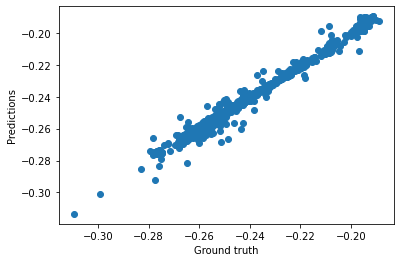

In [66]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [53]:
#%store model_rr_relative_swinging_x

In [54]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [55]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [91]:
# Input
X = np.hstack((X_relative_footsteps_continuous_RR_swing[:, :3], # motion command
               X_relative_footsteps_continuous_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_RR_swing[:, 7]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.991577238770198
RMSE:  0.0017416643646237535
The lowest error is:  1.5100042530247215e-07
The highest error is:  0.024009683636609214
The avg. error is:  0.0010559557370208434


In [92]:
model_rr_relative_swinging_y.coef_

array([[ 0.02831754, -0.16861656, -0.0953761 , -0.08224199,  0.02359811,
        -0.10048776, -0.14292098,  0.11999834, -0.30567477, -0.21623308,
         0.94606433]])

In [93]:
model_rr_relative_swinging_y.intercept_

array([0.03613883])

Text(0, 0.5, 'Predictions')

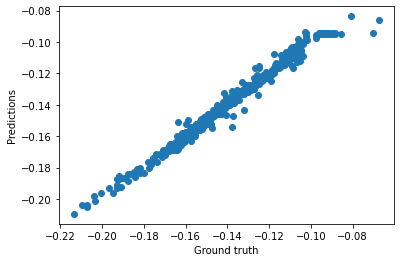

In [94]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [72]:
#%store model_rr_relative_swinging_y

In [73]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [74]:
# Save model
#joblib.dump(model_rr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_y.sav")